# <center> <img src="../../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> Computer Systems Engineering  </center>
---
### <center> Big Data Processing </center>
---
#### <center> **Autumn 2025** </center>
---

**Lab 04**: Data Unions & Joins Pipeline

**Date**: September 23rd 2025

**Student Name**: Ivan Estrella 

**Professor**: Pablo Camarillo Ramirez

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Examples on SparkSQL") \
    .master("spark://e3b502141eaf:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/26 00:18:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Build schema
# Import your module
from IvanE.SparkUtilsIvan import SparkUtils


schema_agencies = SparkUtils.generate_schema([("agency_id", "int"), ("agency_info", "string")])

df_agencies = spark.read.schema(schema_agencies).option("header", True).csv("/opt/spark/work-dir/data/car_service/agencies")
df_agencies.show(truncate=False)


[Stage 0:>                                                          (0 + 1) / 1]

+---------+-----------------------------------------------------+
|agency_id|agency_info                                          |
+---------+-----------------------------------------------------+
|1        |{'agency_name': 'NYC Rentals', 'city': 'New York'}   |
|2        |{'agency_name': 'LA Car Rental', 'city': 'Londres'}  |
|3        |{'agency_name': 'Zapopan Auto', 'city': 'Zapopan'}   |
|4        |{'agency_name': 'SF Cars', 'city': 'San Francisco'}  |
|5        |{'agency_name': 'Mexico Cars', 'city': 'Mexico City'}|
+---------+-----------------------------------------------------+



In [4]:
# Generate rest of the schemas and just printing them to make sure they are oki doky
schema_brands = SparkUtils.generate_schema([("brand_id", "int"), ("brand_info", "string")])
schema_cars = SparkUtils.generate_schema([("car_id", "int"), ("car_info", "string")])
schema_customers = SparkUtils.generate_schema([("customer_id", "int"), ("customer_info", "string")])
schema_rentals = SparkUtils.generate_schema([("rental_id", "int"), ("rental_info", "string")])

# Generate dataframe
df_brands = spark.read.schema(schema_brands).option("header", True).csv("/opt/spark/work-dir/data/car_service/brands")
df_cars = spark.read.schema(schema_cars).option("header", True).csv("/opt/spark/work-dir/data/car_service/cars")
df_customers = spark.read.schema(schema_customers).option("header", True).csv("/opt/spark/work-dir/data/car_service/customers")
df_rentals = spark.read.schema(schema_rentals).option("header", True).csv("/opt/spark/work-dir/data/car_service/rentals")

# Print them all, even agencies just to make sure
df_agencies.show(truncate=False)
df_brands.show(truncate=False)
df_cars.show(truncate=False)
df_customers.show(truncate=False)
df_rentals.show(truncate=False)

+---------+-----------------------------------------------------+
|agency_id|agency_info                                          |
+---------+-----------------------------------------------------+
|1        |{'agency_name': 'NYC Rentals', 'city': 'New York'}   |
|2        |{'agency_name': 'LA Car Rental', 'city': 'Londres'}  |
|3        |{'agency_name': 'Zapopan Auto', 'city': 'Zapopan'}   |
|4        |{'agency_name': 'SF Cars', 'city': 'San Francisco'}  |
|5        |{'agency_name': 'Mexico Cars', 'city': 'Mexico City'}|
+---------+-----------------------------------------------------+

+--------+-----------------------------------------------------+
|brand_id|brand_info                                           |
+--------+-----------------------------------------------------+
|1       |{'brand_name': 'Mercedes-Benz', 'country': 'Germany'}|
|2       |{'brand_name': 'BMW', 'country': 'Germany'}          |
|3       |{'brand_name': 'Audi', 'country': 'Germany'}         |
|4       |{'bra

In [17]:
from pyspark.sql.functions import get_json_object
# Separate JSON
# Agencies
df_better_agencies = df_agencies.withColumn("agency_name",get_json_object("agency_info","$.agency_name")) \
                                .withColumn("city",get_json_object("agency_info","$.city")) \
                                .drop("agency_info")
df_better_agencies.show()

# Brands
df_better_brands = df_brands.withColumn("brand_name",get_json_object("brand_info","$.brand_name")) \
                                .withColumn("country",get_json_object("brand_info","$.country")) \
                                .drop("brand_info")
df_better_brands.show()

# Cars
df_better_cars = df_cars.withColumn("car_name",get_json_object("car_info","$.car_name")) \
                                .withColumn("brand_id",get_json_object("car_info","$.brand_id")) \
                                .withColumn("price_per_day",get_json_object("car_info","$.price_per_day")) \
                                .drop("car_info")
df_better_cars.show()

# Customers
df_better_customers = df_customers.withColumn("customer_name",get_json_object("customer_info","$.customer_name")) \
                                .withColumn("city",get_json_object("customer_info","$.city")) \
                                .withColumn("age",get_json_object("customer_info","$.age")) \
                                .drop("customer_info")
df_better_customers.show()

# Rentals
df_better_rentals = df_rentals.withColumn("car_id",get_json_object("rental_info","$.car_id")) \
                                .withColumn("customer_id",get_json_object("rental_info","$.customer_id")) \
                                .withColumn("agency_id",get_json_object("rental_info","$.agency_id")) \
                                .drop("rental_info")
df_better_rentals.show()



+---------+-------------+-------------+
|agency_id|  agency_name|         city|
+---------+-------------+-------------+
|        1|  NYC Rentals|     New York|
|        2|LA Car Rental|      Londres|
|        3| Zapopan Auto|      Zapopan|
|        4|      SF Cars|San Francisco|
|        5|  Mexico Cars|  Mexico City|
+---------+-------------+-------------+

+--------+-------------+-------+
|brand_id|   brand_name|country|
+--------+-------------+-------+
|       1|Mercedes-Benz|Germany|
|       2|          BMW|Germany|
|       3|         Audi|Germany|
|       4|         Ford|     US|
|       5|          BYD|  China|
|       6|        Honda|  Japan|
|       7|       Toyota|  Japan|
+--------+-------------+-------+

+------+--------------------+--------+-------------+
|car_id|            car_name|brand_id|price_per_day|
+------+--------------------+--------+-------------+
|     1|Chang-Fisher Model 7|       5|          139|
|     2|Sheppard-Tucker M...|       6|           70|
|     3|Fa

In [ ]:
# Join wiht other df and deleting duplicate columns
df_join_everything = df_better_cars.join(df_better_brands, df_better_cars.brand_id == df_better_brands.brand_id).drop(df_better_cars.brand_id)
df_join_everything = df_join_everything.join(df_better_rentals, df_join_everything.car_id == df_better_rentals.car_id).drop(df_join_everything.car_id)
df_join_everything = df_join_everything.join(df_better_agencies, df_join_everything.agency_id == df_better_agencies.agency_id).drop(df_better_agencies.agency_id)
df_join_everything = df_join_everything.join(df_better_customers, df_join_everything.customer_id == df_better_customers.customer_id).drop(df_join_everything.customer_id)


+--------------------+-------------+--------+----------+-------+---------+------+---------+-------------+-------------+-----------+-----------------+-------------+---+
|            car_name|price_per_day|brand_id|brand_name|country|rental_id|car_id|agency_id|  agency_name|         city|customer_id|    customer_name|         city|age|
+--------------------+-------------+--------+----------+-------+---------+------+---------+-------------+-------------+-----------+-----------------+-------------+---+
|Chang-Fisher Model 7|          139|       5|       BYD|  China|      785|     1|        4|      SF Cars|San Francisco|         33|       Corey Cook|    Monterrey| 35|
|Chang-Fisher Model 7|          139|       5|       BYD|  China|      766|     1|        2|LA Car Rental|      Londres|         96|    Laura Gregory|      Londres| 25|
|Chang-Fisher Model 7|          139|       5|       BYD|  China|      762|     1|        3| Zapopan Auto|      Zapopan|        149|      Blake Jones|  Mexico Ci

In [ ]:
# After joining everything I show only the columns asked
df_join_everything = df_join_everything.select("rental_id","car_name","customer_name","agency_name")
df_join_everything.show()
# Count rows just to be sure
row_count = df_join_everything.count()
print(f"Total number of rows: {row_count}")

+---------+--------------------+-----------------+-------------+
|rental_id|            car_name|    customer_name|  agency_name|
+---------+--------------------+-----------------+-------------+
|      785|Chang-Fisher Model 7|       Corey Cook|      SF Cars|
|      766|Chang-Fisher Model 7|    Laura Gregory|LA Car Rental|
|      762|Chang-Fisher Model 7|      Blake Jones| Zapopan Auto|
|      757|Chang-Fisher Model 7|   Nicholas Kline|  NYC Rentals|
|      747|Chang-Fisher Model 7|    Melissa Flynn|LA Car Rental|
|      735|Chang-Fisher Model 7|     Joseph Jones|  NYC Rentals|
|      672|Chang-Fisher Model 7|    Melissa Flynn|      SF Cars|
|      669|Chang-Fisher Model 7|   Susan Ferguson|      SF Cars|
|      662|Chang-Fisher Model 7|  Raymond Navarro|LA Car Rental|
|      654|Chang-Fisher Model 7|   Sherry Simpson|LA Car Rental|
|      617|Chang-Fisher Model 7| Jenny Richardson|LA Car Rental|
|      615|Chang-Fisher Model 7|  Jennifer Torres|LA Car Rental|
|      591|Chang-Fisher M

Total number of rows: 17834


## Parquet file

In [1]:
base_path = "/opt/spark/work-dir/data/"


df_join_everything.write \
            .partitionBy("agency_name") \
            .mode("overwrite") \
            .parquet(base_path + "car_service/output/parquet")

NameError: name 'df_join_everything' is not defined

## CSV files

In [ ]:
df_join_everything.write \
            .partitionBy("agency_name") \
            .mode("overwrite") \
            .option("header", True) \
            .csv(base_path + "car_service/output/csv")

In [ ]:
df_join_everything.write \
            .mode("overwrite") \
            .option("header", True) \
            .csv(base_path + "car_service/output/rentals/csv")

In [ ]:
df_join_everything.write \
            .mode("overwrite") \
            .parquet(base_path + "car_service/output/rentals/parquet")

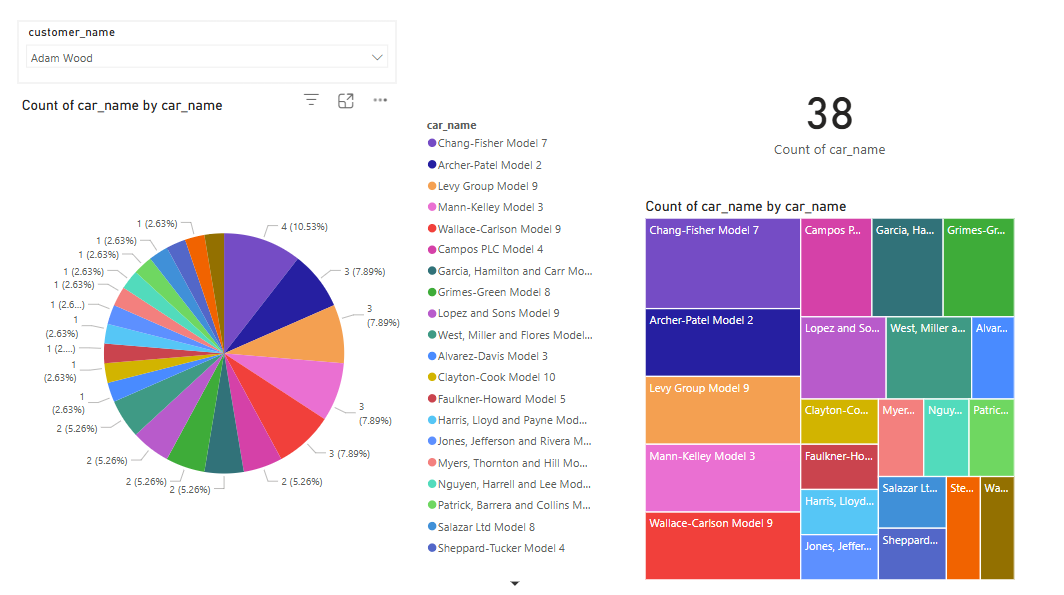

In [ ]:
sc.stop()